In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Leemos el archivo .csv
data = pd.read_csv('Ventas_totales_sin_nulos.csv')

In [4]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           65 non-null     int64  
 1   indice_tiempo                        65 non-null     object 
 2   ventas_precios_corrientes            65 non-null     float64
 3   ventas_precios_constantes            65 non-null     float64
 4   ventas_totales_canal_venta           65 non-null     float64
 5   salon_ventas                         65 non-null     float64
 6   canales_on_line                      65 non-null     float64
 7   ventas_totales_medio_pago            65 non-null     float64
 8   efectivo                             65 non-null     float64
 9   tarjetas_debito                      65 non-null     float64
 10  tarjetas_credito                     65 non-null     float64
 11  otros_medios                      

In [6]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc[ : , 2:24]        #variables tipo numérico(int,float)
cualitativas = data.iloc[ : , [0,1] ]       #variables tipo texto(object)

<Figure size 1500x800 with 0 Axes>

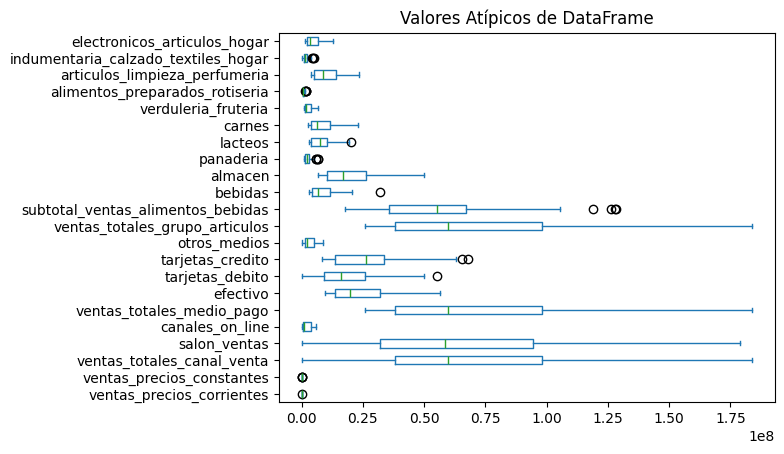

In [7]:
#Realizamos diagrama de caja o bigote de cada columna del DataFrame 
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("Valores Atípicos de DataFrame")
plt.show()   #Dibujamos el diagrama 

Procedimiento "Desviación Estándar" para eliminar Outliers en DataFrame

In [10]:
#Método aplicando desviacipon estándar. Encuentro los valores extremos 
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Limite superior permitido ", Limite_Superior)
print("Limite inferior permitido ", Limite_Inferior)

Limite superior permitido  ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           2.075176e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.861864e+07
tarjetas_credito                       7.221755e+07
otros_medios                           1.055233e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.430213e+08
bebidas                                2.646939e+07
almacen                                5.498569e+07
panaderia                              6.907607e+06
lacteos                                2.223825e+07
carnes                                 2.509435e+07
verduleria_fruteria                    7.566285e+06
alimentos_preparados_rotiseria       

In [11]:
#Obtenemos datos y los Outliers se convierten en nulos en el DataFrame
data3 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.000000e+01,9.189746e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,7940040.869,...,1.975921e+07,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,10.000,...,2.064169e+07,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07


In [12]:
#Corroboramos valores nulos del DataFrame
valores_nulos = data3.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
dtype: int64

In [13]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"

#Realizamos una copia del DataFrame
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(),1))
data_clean

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,25363.3,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.000000e+01,9.189746e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,7940040.869,...,1.975921e+07,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,10.000,...,2.064169e+07,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07


In [14]:
#Corroboramos valores nulos del DataFrame LIMPIO
valores_nulos = data_clean.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
dtype: int64

Procedimiento "Cuantiles" para sustituir Outliers en el DataFrame

In [16]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y = cuantitativas

percentiles25 = y.quantile(0.25) #Es el Q1
percentiles75 = y.quantile(0.75) #Es el Q2
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido ", Limite_Superior_iqr)
print("Limite inferior permitido ", Limite_Inferior_iqr)

Limite superior permitido  ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.881567e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.150700e+07
tarjetas_credito                       6.385618e+07
otros_medios                           1.074414e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.015298e+07
panaderia                              5.314390e+06
lacteos                                1.994066e+07
carnes                                 2.390920e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria       

In [17]:
#Obtenemos datos limpios del DataFrame
data3_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data3_iqr

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.000000e+01,9.189746e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,7940040.869,...,1.975921e+07,4.541886e+07,NaN,1.841916e+07,2.082760e+07,6.886240e+06,NaN,2.294201e+07,3.912852e+06,1.089879e+07
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,NaN,10.000,...,2.064169e+07,4.999168e+07,NaN,1.930946e+07,2.287784e+07,6.510666e+06,NaN,2.313127e+07,NaN,1.203960e+07


In [18]:
#Corroboramos valores nulos del DataFrame LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

ventas_precios_corrientes              1
ventas_precios_constantes              3
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       2
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      4
bebidas                                1
almacen                                0
panaderia                              4
lacteos                                1
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         4
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    3
electronicos_articulos_hogar           0
dtype: int64

In [20]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"

#Realizamos una copia del DataFrame
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,25222.6,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.000000e+01,9.189746e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,7940040.869,...,1.975921e+07,4.541886e+07,2.296957e+06,1.841916e+07,2.082760e+07,6.886240e+06,6.215829e+05,2.294201e+07,3.912852e+06,1.089879e+07
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,2.591020e+07,10.000,...,2.064169e+07,4.999168e+07,2.296957e+06,1.930946e+07,2.287784e+07,6.510666e+06,6.215829e+05,2.313127e+07,1.633086e+06,1.203960e+07


In [21]:
#Unimos el DataFrame cuantitativo limpio con el DataFrame cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,25222.6,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.000000e+01,9.189746e+06
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,1.975921e+07,4.541886e+07,2.296957e+06,1.841916e+07,2.082760e+07,6.886240e+06,6.215829e+05,2.294201e+07,3.912852e+06,1.089879e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,2.064169e+07,4.999168e+07,2.296957e+06,1.930946e+07,2.287784e+07,6.510666e+06,6.215829e+05,2.313127e+07,1.633086e+06,1.203960e+07


In [22]:
#Convertir DataFrame a .csv
Datos_limpios.to_csv("Datos_limpios.csv")